# TCM Final Project - Heather and Allen
## Analyzing different cryptocurrencies and their changes over time

**Project description:** For our MAKE project, we decided to use what we learned in class regarding Python and Pandas and analyze a few data questions centered around cryptocurrencies, with the goal of developing a simplified investment outlook on BTC, Ethereum, Litecoin, and Dogecoin!

We also decided to take this project a step further and research how to build visual graphs into Jupyter Notebook as well as make forecasts using exponential smoothing. We accomplished this through pip installing additional libraries like Seaborns, Statsmodel, and Mathplot. 

We pulled a sample dataset from Kaggle: https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory

**Our BIG question:** When should you invest in cryptocurrencies and which one?
<div>
<table><tr>
<td> 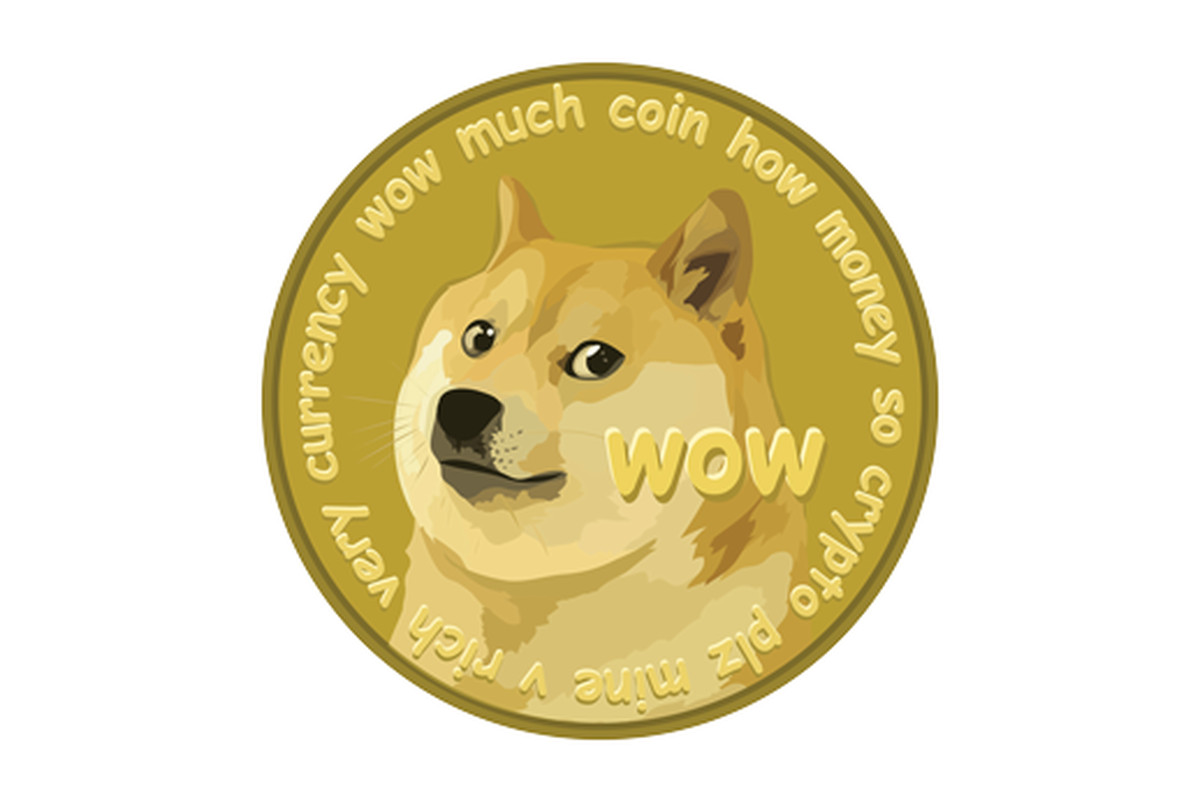 </td>
<td> 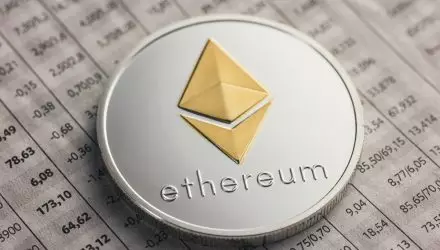 </td>
<td> 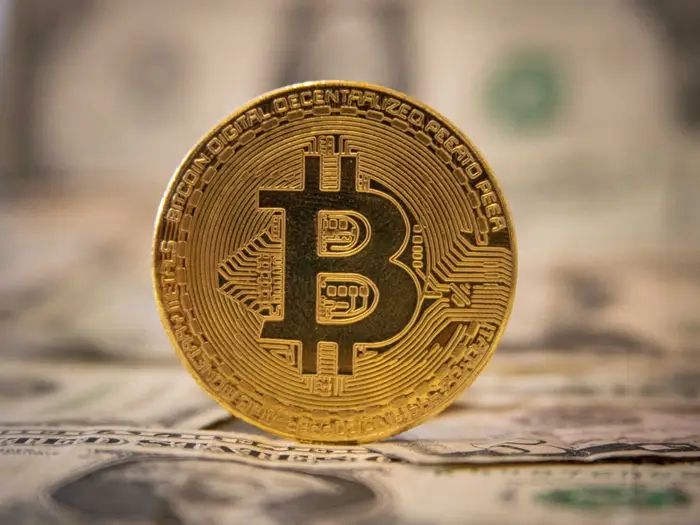 </td>
<td> 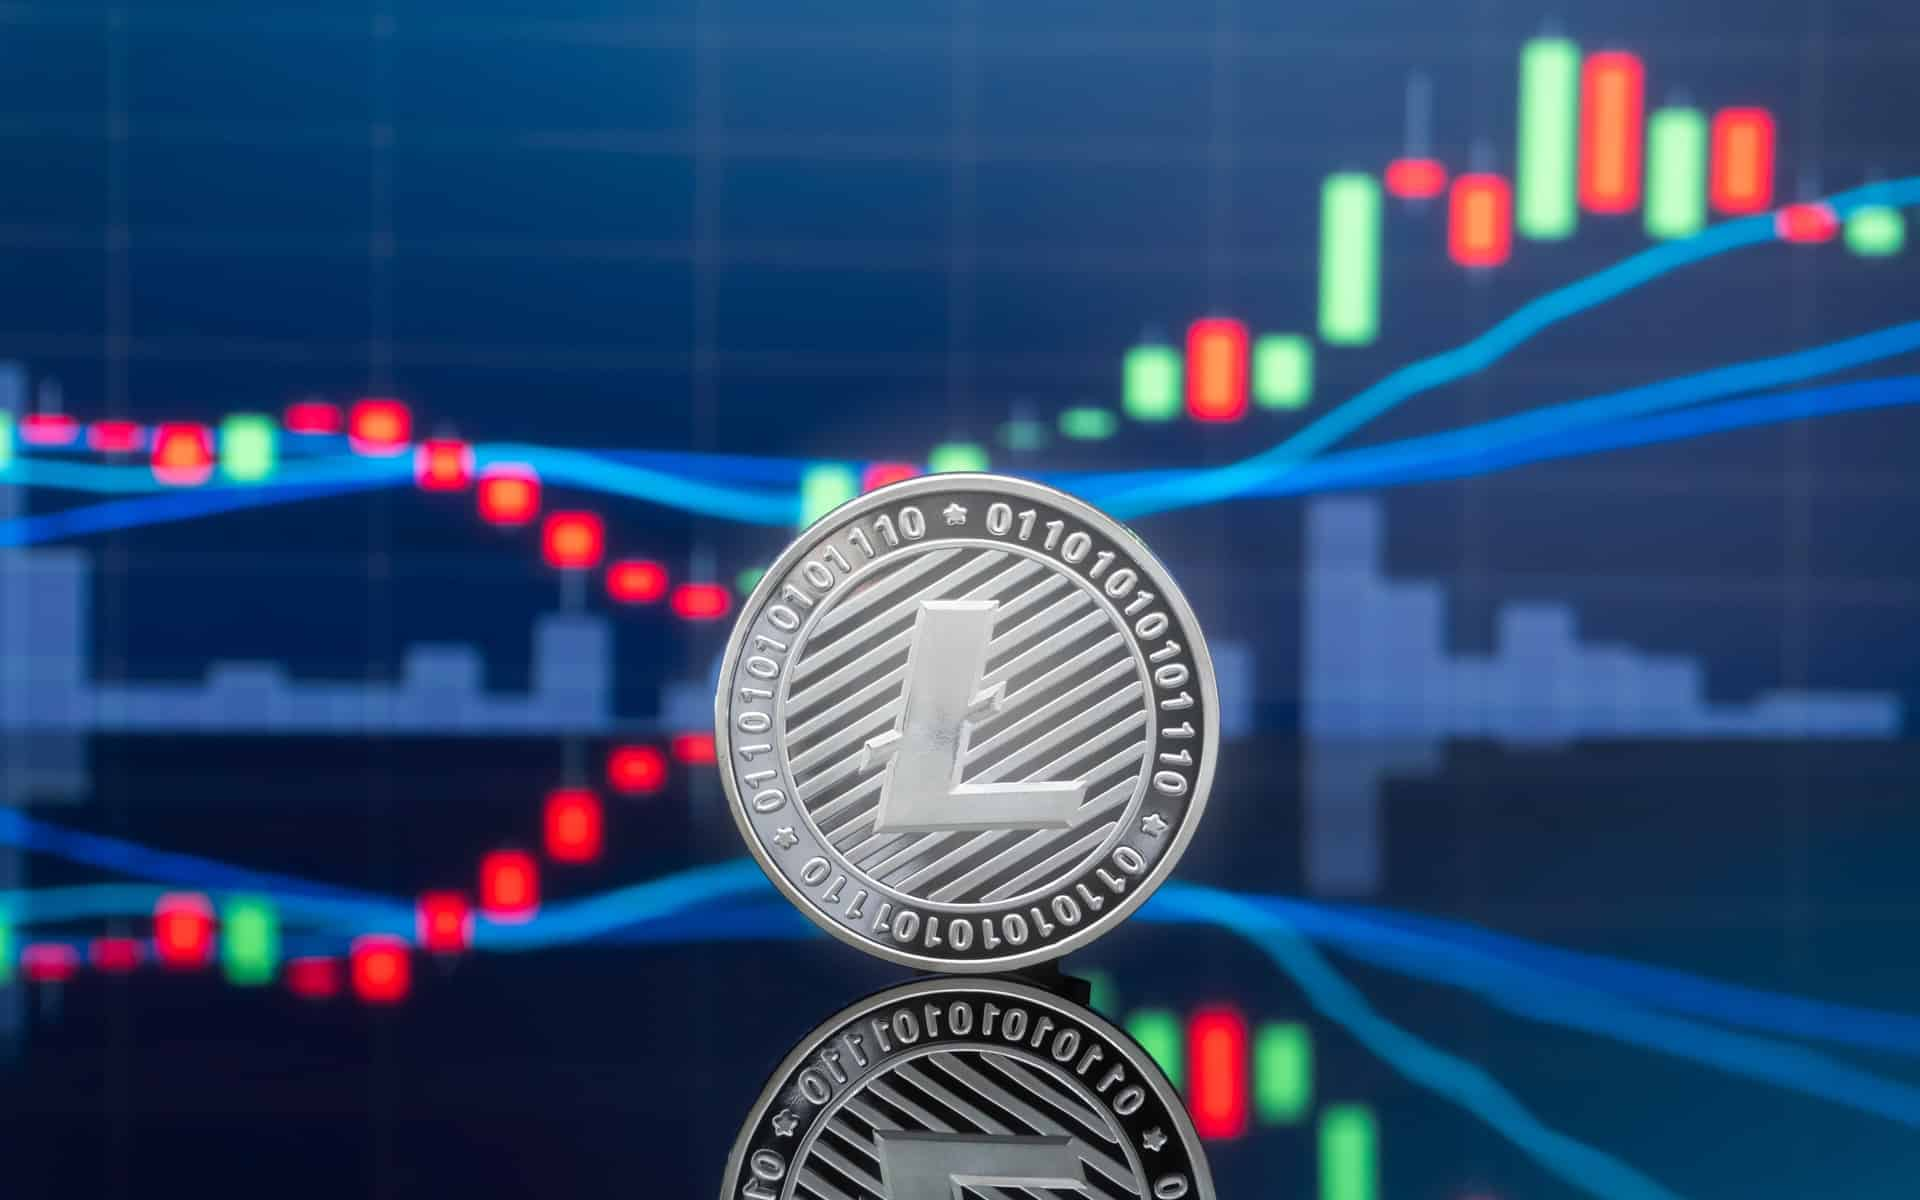 </td>
    
</tr></table>
    
Images:<div>Bictoin (https://www.businessinsider.com/more-companies-accepting-bitcoin-cryptocurrency-paypal-starbucks-2021-4)
  <div>  Dogecoin (https://www.theverge.com/2021/4/16/22387486/dogecoin-run-valuation-cryptocurrency-spike-elon-musk)
 <div>   Ethereum (https://www.etftrends.com/crypto-channel/dont-lose-track-of-ethereum-bitcoin-bonanza/)
     <div> Litecoin (https://coingape.com/ltc-coils-within-a-zone-awaiting-breakout/)

**Some questions we considered:**
1. How did the historical prices / market capitalizations of various currencies change over time?
2. Can we forecast the future price of the currencies?
3. Are there seasonal trends in price fluctuations? Cyclical changes?
4. How does the price fluctuations of currencies correlate with each other?

# Table of Contents

### I. Importing, Cleaning and Understanding the Data

### II. Initial Descriptive Statistics

### III. Question 1

### IV. Question 2

a. Bitcoin

b. Ethereum

c. Dogecoin

d. Litecoin
    
### V. Question 3

a. Bitcoin

b. Ethereum

c. Dogecoin

d. Litecoin

### VIII. Question 4

### VIII. Conclusion

# I. Import, Clearing and Understanding the Data

## Import the Data

In [1]:
#import relevant libraries
#must first pip install seaborn and statsmodels in VSCode

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

from datetime import datetime

pd.options.mode.chained_assignment = None

In [2]:
#importing Cyrptocurrency data 
bitcoin = pd.read_csv('coin_Bitcoin.csv')
ether = pd.read_csv('coin_Ethereum.csv')
dogecoin = pd.read_csv('coin_Dogecoin.csv')
litecoin = pd.read_csv('coin_Litecoin.csv')

## Understand the data

After data is uploaded, we should spend some time understanding the data. Below are definitions of each row of data:

|Variable Name|Definition|
|-------------|----------|
|SNo| Arbitrary number, numbers each row and acts similar to an index|
|Name| Cryptocurreny name|
|Symbol| Crytocurrency symbol|
|Date| Observation date for the coin in the United States|
|High| Highest price on the given day|
|Low| Lowest price on the given day|
|Open| Opening price on the given day|
|Close| Closing price on the given day|
|Volume| Volume of transactions on the given day|
|Market Cap| Market capitalization in USD|

We also need to understand the differences in our data by taking a brief look at the dataset itself. For example, Bitcoin has data starting in 2016, but ether starts in 2015. All the datasets have data up until February 27, 2021.

In [3]:
#Overview of bitcoin data types
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2862 entries, 0 to 2861
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2862 non-null   int64  
 1   Name       2862 non-null   object 
 2   Symbol     2862 non-null   object 
 3   Date       2862 non-null   object 
 4   High       2862 non-null   float64
 5   Low        2862 non-null   float64
 6   Open       2862 non-null   float64
 7   Close      2862 non-null   float64
 8   Volume     2862 non-null   float64
 9   Marketcap  2862 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 223.7+ KB


In [4]:
bitcoin.head()

SNo     Name Symbol                 Date        High         Low  \
0    1  Bitcoin    BTC  2013-04-29 23:59:59  147.488007  134.000000   
1    2  Bitcoin    BTC  2013-04-30 23:59:59  146.929993  134.050003   
2    3  Bitcoin    BTC  2013-05-01 23:59:59  139.889999  107.720001   
3    4  Bitcoin    BTC  2013-05-02 23:59:59  125.599998   92.281898   
4    5  Bitcoin    BTC  2013-05-03 23:59:59  108.127998   79.099998   

         Open       Close  Volume     Marketcap  
0  134.444000  144.539993     0.0  1.603769e+09  
1  144.000000  139.000000     0.0  1.542813e+09  
2  139.000000  116.989998     0.0  1.298955e+09  
3  116.379997  105.209999     0.0  1.168517e+09  
4  106.250000   97.750000     0.0  1.085995e+09

In [5]:
ether.head()

SNo      Name Symbol                 Date      High       Low      Open  \
0    1  Ethereum    ETH  2015-08-08 23:59:59  2.798810  0.714725  2.793760   
1    2  Ethereum    ETH  2015-08-09 23:59:59  0.879810  0.629191  0.706136   
2    3  Ethereum    ETH  2015-08-10 23:59:59  0.729854  0.636546  0.713989   
3    4  Ethereum    ETH  2015-08-11 23:59:59  1.131410  0.663235  0.708087   
4    5  Ethereum    ETH  2015-08-12 23:59:59  1.289940  0.883608  1.058750   

      Close     Volume     Marketcap  
0  0.753325   674188.0  4.548689e+07  
1  0.701897   532170.0  4.239957e+07  
2  0.708448   405283.0  4.281836e+07  
3  1.067860  1463100.0  6.456929e+07  
4  1.217440  2150620.0  7.364501e+07

In [6]:
dogecoin.head()

SNo      Name Symbol                 Date      High       Low      Open  \
0    1  Dogecoin   DOGE  2013-12-16 23:59:59  0.000866  0.000150  0.000299   
1    2  Dogecoin   DOGE  2013-12-17 23:59:59  0.000289  0.000116  0.000207   
2    3  Dogecoin   DOGE  2013-12-18 23:59:59  0.000362  0.000205  0.000267   
3    4  Dogecoin   DOGE  2013-12-19 23:59:59  0.001520  0.000328  0.000395   
4    5  Dogecoin   DOGE  2013-12-20 23:59:59  0.001143  0.000662  0.001143   

      Close  Volume     Marketcap  
0  0.000205     0.0  1.509085e+06  
1  0.000269     0.0  2.169688e+06  
2  0.000362     0.0  3.188943e+06  
3  0.001162     0.0  1.115034e+07  
4  0.000704     0.0  7.284337e+06

In [7]:
litecoin.head()

SNo      Name Symbol                 Date     High      Low     Open  \
0    1  Litecoin    LTC  2013-04-29 23:59:59  4.57360  4.22564  4.36676   
1    2  Litecoin    LTC  2013-04-30 23:59:59  4.57238  4.16896  4.40352   
2    3  Litecoin    LTC  2013-05-01 23:59:59  4.35686  3.52029  4.28954   
3    4  Litecoin    LTC  2013-05-02 23:59:59  4.03930  3.00717  3.78002   
4    5  Litecoin    LTC  2013-05-03 23:59:59  3.45361  2.39594  3.39044   

     Close  Volume     Marketcap  
0  4.38390     0.0  7.538896e+07  
1  4.29649     0.0  7.402092e+07  
2  3.80101     0.0  6.560460e+07  
3  3.37198     0.0  5.828798e+07  
4  3.04491     0.0  5.269485e+07

In [8]:
bitcoin.tail()

SNo     Name Symbol                 Date          High           Low  \
2857  2858  Bitcoin    BTC  2021-02-23 23:59:59  54204.929756  45290.590268   
2858  2859  Bitcoin    BTC  2021-02-24 23:59:59  51290.136695  47213.498162   
2859  2860  Bitcoin    BTC  2021-02-25 23:59:59  51948.966982  47093.853019   
2860  2861  Bitcoin    BTC  2021-02-26 23:59:59  48370.785260  44454.842114   
2861  2862  Bitcoin    BTC  2021-02-27 23:59:59  48253.270101  45269.025766   

              Open         Close        Volume     Marketcap  
2857  54204.929756  48824.426869  1.061025e+11  9.099259e+11  
2858  48835.087661  49705.333316  6.369552e+10  9.263931e+11  
2859  49709.082425  47093.853019  5.450657e+10  8.777661e+11  
2860  47180.464054  46339.760083  3.509679e+11  8.637523e+11  
2861  46344.772237  46188.451275  4.591095e+10  8.609781e+11

## Clean the Data

In [9]:
# change to datetype
bitcoin['Date'] = bitcoin['Date'].astype(str)
ether['Date'] = ether['Date'].astype(str)
dogecoin['Date'] = dogecoin['Date'].astype(str)
litecoin['Date'] = litecoin['Date'].astype(str)

# remove the time
bitcoin['Date'] = bitcoin['Date'].str.replace(pat = ' 23:59:59', repl ='')
ether['Date'] = ether['Date'].str.replace(pat = ' 23:59:59', repl ='')
dogecoin['Date'] = dogecoin['Date'] .str.replace(pat = ' 23:59:59', repl ='')
litecoin['Date'] = litecoin['Date'] .str.replace(pat = ' 23:59:59', repl ='')

#reformat the date
bitcoin['Date'] = pd.to_datetime(bitcoin['Date'], infer_datetime_format=True, format= '%Y%m%d')
ether['Date'] = pd.to_datetime(ether['Date'], infer_datetime_format=True, format= '%Y%m%d')
dogecoin['Date'] = pd.to_datetime(dogecoin['Date'], infer_datetime_format=True, format= '%Y%m%d')
litecoin['Date'] = pd.to_datetime(litecoin['Date'], infer_datetime_format=True, format= '%Y%m%d')

In [10]:
#removing SNo column to clean up columns
bitcoin = bitcoin.drop(['SNo'], axis=1)
ether = ether.drop(['SNo'], axis = 1)
dogecoin = dogecoin.drop(['SNo'], axis=1)
litecoin = litecoin.drop(['SNo'], axis = 1)

In [11]:
#check columns are a float data type so we can use for calculations
bitcoin.dtypes

Name                 object
Symbol               object
Date         datetime64[ns]
High                float64
Low                 float64
Open                float64
Close               float64
Volume              float64
Marketcap           float64
dtype: object

In [12]:
#keeping only 2016-2021 data, so all datasets match
bitcoin = bitcoin.loc[(bitcoin["Date"] >= '2016-01-01')]
ether = ether.loc[(ether["Date"] >= '2016-01-01')]
dogecoin = dogecoin.loc[(dogecoin["Date"] >= '2016-01-01')]
litecoin = litecoin.loc[(litecoin['Date'] >= '2016-01-01')]

In [13]:
#create a new column called DailyChange (% change in price between open and closing)
bitcoin['DailyChange'] = (bitcoin['Open'] - bitcoin['Close'])/bitcoin['Open']
ether['DailyChange'] = (ether['Open'] - ether['Close'])/ether['Open']
dogecoin['DailyChange'] = (dogecoin['Open'] - dogecoin['Close'])/dogecoin['Open']
litecoin['DailyChange'] = (litecoin['Open'] - litecoin['Close'])/litecoin['Open']

# II. Initial Descriptive Statistics
We need to first explore the basic features of the data information. Using the describe functions, we can see how the different pieces of data are centered and spread.

In [14]:
#looking at descriptive statistics for bitcoin
bitcoin_descriptive = bitcoin.describe()
bitcoin_descriptive

High           Low          Open         Close        Volume  \
count   1885.000000   1885.000000   1885.000000   1885.000000  1.885000e+03   
mean    7358.253550   6945.864419   7154.465081   7178.293168  1.362054e+10   
std     7860.880297   7254.949114   7565.134498   7615.710347  1.882449e+10   
min      374.950012    354.914001    365.072998    364.330994  2.851400e+07   
25%     1251.609985   1215.560059   1231.920044   1231.920044  4.227060e+08   
50%     6617.350000   6433.870117   6510.069824   6517.180000  5.639320e+09   
75%     9540.465393   9231.530273   9374.929987   9375.474759  2.068151e+10   
max    58330.572142  55672.609513  57532.738864  57539.943668  3.509679e+11   

          Marketcap  DailyChange  
count  1.885000e+03  1885.000000  
mean   1.279721e+11    -0.003189  
std    1.413577e+11     0.039587  
min    5.496598e+09    -0.254702  
25%    2.006275e+10    -0.017773  
50%    1.126373e+11    -0.002193  
75%    1.699888e+11     0.011406  
max    1.072263e+12     0.371869

In [15]:
#looking at descriptive statistics for ether
ether_descriptive = ether.describe()
ether_descriptive

High          Low         Open        Close        Volume  \
count  1885.000000  1885.000000  1885.000000  1885.000000  1.885000e+03   
mean    287.676047   266.048742   277.361060   278.064271  5.850077e+09   
std     325.383998   294.912770   311.369588   312.362349  8.260745e+09   
min       0.954822     0.929835     0.933712     0.937124  2.060620e+05   
25%      51.274502    48.297100    49.971401    50.037300  1.456020e+08   
50%     206.361445   194.783997   200.608867   200.635000  2.208720e+09   
75%     364.438995   341.416992   353.202267   353.362266  8.446546e+09   
max    2036.286493  1896.684508  1959.902977  1960.164744  6.073363e+10   

          Marketcap  DailyChange  
count  1.885000e+03  1885.000000  
mean   2.907151e+10    -0.005414  
std    3.386433e+10     0.059219  
min    7.117666e+07    -0.337189  
25%    4.553738e+09    -0.028227  
50%    2.089154e+10    -0.000638  
75%    3.675680e+10     0.020766  
max    2.249103e+11     0.423088

In [16]:
#looking at descriptive statistics for dogecoin
doge_descriptive = dogecoin.describe()
doge_descriptive

High          Low         Open        Close        Volume  \
count  1885.000000  1885.000000  1885.000000  1885.000000  1.885000e+03   
mean      0.003452     0.003017     0.003220     0.003242  1.481319e+08   
std       0.007852     0.006236     0.006992     0.007055  9.963038e+08   
min       0.000138     0.000134     0.000134     0.000135  4.147720e+04   
25%       0.000483     0.000436     0.000453     0.000451  1.673200e+06   
50%       0.002481     0.002327     0.002406     0.002409  1.699374e+07   
75%       0.003244     0.003019     0.003134     0.003140  6.405696e+07   
max       0.084945     0.068525     0.078773     0.078825  2.540331e+10   

          Marketcap  DailyChange  
count  1.885000e+03  1885.000000  
mean   3.925630e+08    -0.006334  
std    9.029127e+08     0.108158  
min    1.379595e+07    -3.556254  
25%    4.896589e+07    -0.018657  
50%    2.886411e+08     0.001194  
75%    3.717361e+08     0.019641  
max    1.011246e+10     0.397983

In [17]:
#looking at descriptive statistics for litecoin
litecoin_descriptive = litecoin.describe()
litecoin_descriptive

High          Low         Open        Close        Volume  \
count  1885.000000  1885.000000  1885.000000  1885.000000  1.885000e+03   
mean     62.773786    57.692113    60.325073    60.398379  1.697506e+09   
std      59.538790    52.984009    56.452743    56.464574  2.342053e+09   
min       3.055340     2.919460     2.965720     2.996780  5.074800e+05   
25%      11.002100     9.931880    10.342100    10.421600  6.113700e+07   
50%      51.252319    47.715779    49.464957    49.458046  4.842540e+08   
75%      79.649200    74.149942    76.931999    76.942497  2.759602e+09   
max     375.286011   335.674988   359.125000   358.335999  1.799426e+10   

          Marketcap  DailyChange  
count  1.885000e+03  1885.000000  
mean   3.594282e+09    -0.003373  
std    3.297088e+09     0.058186  
min    1.320557e+08    -0.670443  
25%    5.281965e+08    -0.021926  
50%    3.032855e+09     0.000556  
75%    4.723825e+09     0.020017  
max    1.948262e+10     0.361582

In [18]:
#combine all datasets to compare together using append
df_all = bitcoin.append(ether)
df_all = df_all.append(dogecoin)
df_all = df_all.append(litecoin)

df_all

Name Symbol       Date        High         Low        Open  \
977    Bitcoin    BTC 2016-01-01  436.246002  427.515015  430.721008   
978    Bitcoin    BTC 2016-01-02  436.062012  431.869995  434.622009   
979    Bitcoin    BTC 2016-01-03  433.743011  424.705994  433.578003   
980    Bitcoin    BTC 2016-01-04  434.516998  429.084015  430.061005   
981    Bitcoin    BTC 2016-01-05  434.182007  429.675995  433.069000   
...        ...    ...        ...         ...         ...         ...   
2857  Litecoin    LTC 2021-02-23  208.369670  159.684673  208.123407   
2858  Litecoin    LTC 2021-02-24  189.165459  169.789009  176.966769   
2859  Litecoin    LTC 2021-02-25  204.743842  176.032145  181.385422   
2860  Litecoin    LTC 2021-02-26  182.075844  163.248248  179.128519   
2861  Litecoin    LTC 2021-02-27  179.929872  167.908789  170.431423   

           Close        Volume     Marketcap  DailyChange  
977   434.334015  3.627890e+07  6.529300e+09    -0.008388  
978   433.437988  3.009660e+07  6.517390e+09     0.002724  
979   430.010986  3.963380e+07  6.467430e+09     0.008227  
980   433.091003  3.847750e+07  6.515713e+09    -0.007046  
981   431.959991  3.452260e+07  6.500393e+09     0.002561  
...          ...           ...           ...          ...  
2857  176.934915  1.094470e+10  1.177356e+10     0.149856  
2858  181.378501  7.205360e+09  1.207051e+10    -0.024930  
2859  178.901843  7.327999e+09  1.190489e+10     0.013692  
2860  170.398153  7.875998e+09  1.134030e+10     0.048738  
2861  172.100447  4.991079e+09  1.145486e+10    -0.009793  

[7540 rows x 10 columns]

In [19]:
# dataframe to describe and compare individual coins
df_all.groupby("Name")[["Close", "DailyChange"]].describe()

Close                                                     \
           count         mean          std         min          25%   
Name                                                                  
Bitcoin   1885.0  7178.293168  7615.710347  364.330994  1231.920044   
Dogecoin  1885.0     0.003242     0.007055    0.000135     0.000451   
Ethereum  1885.0   278.064271   312.362349    0.937124    50.037300   
Litecoin  1885.0    60.398379    56.464574    2.996780    10.421600   

                                                 DailyChange            \
                  50%          75%           max       count      mean   
Name                                                                     
Bitcoin   6517.180000  9375.474759  57539.943668      1885.0 -0.003189   
Dogecoin     0.002409     0.003140      0.078825      1885.0 -0.006334   
Ethereum   200.635000   353.362266   1960.164744      1885.0 -0.005414   
Litecoin    49.458046    76.942497    358.335999      1885.0 -0.003373   

                                                                      
               std       min       25%       50%       75%       max  
Name                                                                  
Bitcoin   0.039587 -0.254702 -0.017773 -0.002193  0.011406  0.371869  
Dogecoin  0.108158 -3.556254 -0.018657  0.001194  0.019641  0.397983  
Ethereum  0.059219 -0.337189 -0.028227 -0.000638  0.020766  0.423088  
Litecoin  0.058186 -0.670443 -0.021926  0.000556  0.020017  0.361582

In [20]:
#Outlier Calculation
#HEY WE NEED TO DO ONE CAUSE I MENTION IT IN THE ANALYSIS

**Observations**: First, we have 1885 data points per coin, meaning one data point to represent one day for the past 4 years since 2016. We specifically compared closing prices and the daily change because we wanted to see how much these coins were actually selling for at the end of the day and how much they change in a day. It's interesting to look at the closing prices for Bitcoin, Ethereum and Litecoin since their mean and medians are fairly close, but their maximum values are around 7-9 times higher. The maximum value is outside the range of three standard deviations and the interquartile range, so we can assume that they are considered outliers.

## Question 1 - How did the historical prices / market capitalizations of various currencies change over time?

Text(0.5, 1.0, 'Litecoin')

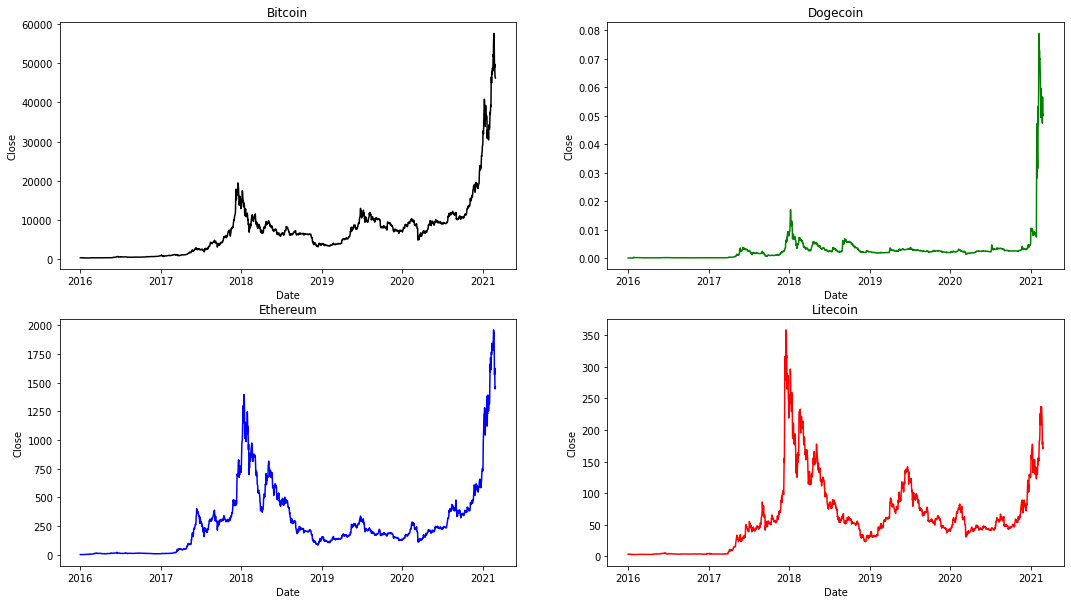

In [21]:
fig, axs = plt.subplots(ncols=2, nrows=2)
fig.set_size_inches(18,10)

#Bitcoin graph
ax = sns.lineplot(data = bitcoin, x = "Date", y = "Close", ax=axs[0, 0], color='black')
ax.set_title('Bitcoin')

#Ethereum graph
ax2 = sns.lineplot(data = ether, x = "Date", y = "Close", ax=axs[1, 0], color='blue')
ax2.set_title('Ethereum')

#Dogecoin graph
ax3 = sns.lineplot(data = dogecoin, x = "Date", y = "Close", ax=axs[0, 1], color='green')
ax3.set_title('Dogecoin')

#Litecoin graph
ax4 = sns.lineplot(data = litecoin, x = "Date", y = "Close", ax=axs[1, 1], color='red')
ax4.set_title('Litecoin')

Text(0.5, 1.0, 'Litecoin')

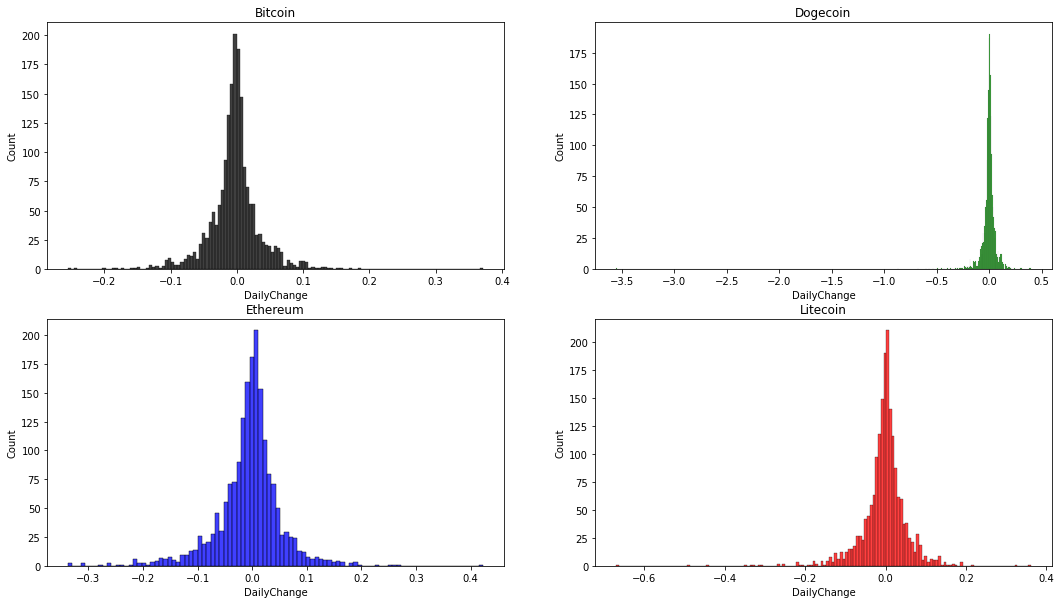

In [22]:
fig, axs = plt.subplots(ncols=2, nrows=2)
fig.set_size_inches(18,10)

#Bitcoin graph
ax = sns.histplot(bitcoin['DailyChange'], ax=axs[0, 0], color='black')
ax.set_title('Bitcoin')

#Ethereum graph
ax2 = sns.histplot(ether['DailyChange'], ax=axs[1, 0], color='blue')
ax2.set_title('Ethereum')

#Dogecoin graph
ax3 = sns.histplot(dogecoin['DailyChange'], ax=axs[0, 1], color='green')
ax3.set_title('Dogecoin')

#Litecoin graph
ax4 = sns.histplot(litecoin['DailyChange'], ax=axs[1, 1], color='red')
ax4.set_title('Litecoin')

**Observations:** Generally looking at the graphs, we see a corresponding spike in 2018 followed by a small spike in mid 2019 and a surge in 2021 in all respective cryptocurrencies. Dogecoin doesn't follow the pattern as precisely as the other three coins, but we can assume since it is more commonly known to be a meme or joke coin. 

**Commentary on Cryptocurrency Performance**: According to some news and speculators, the bubble in 2018 and the subsequent crash, as we can see reflected in our line graphs, was mostly due to excitement and bandwagoning rather than true intrinsic value. In 2018, there was not as much movement from large institutions supporting ...

Source: https://www.fastcompany.com/90285052/beyond-the-bubble-what-happened-to-bitcoin-in-2018#:~:text=It's%20like%20grilling%20a%20shit,2018%2C%20it%20began%20to%20fall.

## Question 2 - Can we forecast the future price of the currencies?

## A. Bitcoin

### Simple Exponential Smoothing
**What is Simple Exponential Smoothing (SES)?**

![SEM2.jpg](SEM2.jpg)

**Why is this relevant for our data?**

Single Exponential Smoothing, is a time series forecasting method for that only requires a single parameter alpha that is called the smoothing factor or smoothing coefficient. This parameter controls the rate at which the influence of the observations at prior time steps decay exponentially. We are looking at this basic form of forecasting first to gather a basic idea of how we might look into future prices, without considering any other factors besides trend or seasonality.

In [23]:
#Limit data to most recent year
bitcoin_q2 = bitcoin.loc[(bitcoin['Date'] >= '2020-01-01')]
ether_q2 = ether.loc[(ether['Date'] >= '2020-01-01')]
dogecoin_q2 = dogecoin.loc[(dogecoin['Date'] >= '2020-01-01')]
litecoin_q2 = litecoin.loc[(litecoin['Date'] >= '2020-01-01')]

#Set index as date
bitcoin_q2.index = bitcoin_q2['Date']
ether_q2.index = ether_q2['Date']
dogecoin_q2.index = dogecoin_q2['Date']
litecoin_q2.index = litecoin_q2['Date']

In [24]:
#Set frequency value to every 15 days
bitcoin_q2 = bitcoin_q2.asfreq("15D")
ether_q2 = ether_q2.asfreq("15D")
dogecoin_q2 = dogecoin_q2.asfreq("15D")
litecoin_q2 = litecoin_q2.asfreq("15D")

In [25]:
#Create new dataframe based on closing data prices
var1 = bitcoin_q2['Close']
var2 = ether_q2['Close']
var3 = dogecoin_q2['Close']
var4 = litecoin_q2['Close']

In [26]:
#Run Simple exponential smoothing analysis
fit1_bitcoin = SimpleExpSmoothing(var1).fit(optimized = True)
fit1_bitcoin.summary()

c:\users\heather\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                       SimpleExpSmoothing Model Results                       
==============================================================================
Dep. Variable:                  Close   No. Observations:                   29
Model:             SimpleExpSmoothing   SSE                      499538428.419
Optimized:                       True   AIC                            487.195
Trend:                           None   BIC                            489.930
Seasonal:                        None   AICC                           488.862
Seasonal Periods:                None   Date:                 Mon, 10 May 2021
Box-Cox:                        False   Time:                         09:30:07
Box-Cox Coeff.:                  None                                         
==============================================================================
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.9950000                alpha                 True
initial_level              7200.1744                  l.0                 True
------------------------------------------------------------------------------
"""

In [27]:
# Create a forecast
fcast1 = fit1_bitcoin.forecast(4).rename("Simple EM")

fcast1

2021-03-11    49688.860044
2021-03-26    49688.860044
2021-04-10    49688.860044
2021-04-25    49688.860044
Freq: 15D, Name: Simple EM, dtype: float64

### Double Exponential Smoothing
**What is Double Exponential Smoothing?**
![DEM2.jpg](DEM2.jpg)

**Why is this relevant to our dataset?**

Double exponential smoothing accounts for not only have a level, but a trend in the data. As we saw in the Bitcoin data, at times there seems to be an upwards trend or a downwards trend that our simple exponential smoothing model simply does not have the capabilities to account for. Having a second smoothing parameter will hopefully increase the accuracy and precision of the forecast.

In [28]:
#Run a double exponential smoothing analysis
fit2_bitcoin = Holt(var1).fit()
fit2_bitcoin.summary()

c:\users\heather\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                              Holt Model Results                              
==============================================================================
Dep. Variable:                  Close   No. Observations:                   29
Model:                           Holt   SSE                      338661836.837
Optimized:                       True   AIC                            479.923
Trend:                       Additive   BIC                            485.392
Seasonal:                        None   AICC                           483.741
Seasonal Periods:                None   Date:                 Mon, 10 May 2021
Box-Cox:                        False   Time:                         09:30:07
Box-Cox Coeff.:                  None                                         
==============================================================================
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.5471429                alpha                 True
smoothing_trend            0.5471429                 beta                 True
initial_level              7200.1744                  l.0                 True
initial_trend              1523.6114                  b.0                 True
------------------------------------------------------------------------------
"""

In [29]:
#Create a forecast
fcast2 = fit2_bitcoin.forecast(4).rename("Double EM")

fcast2

2021-03-11    56183.459040
2021-03-26    62435.664621
2021-04-10    68687.870203
2021-04-25    74940.075784
Freq: 15D, Name: Double EM, dtype: float64

### Compare with Actual Data from the last two months

How accurate are our simple and double exponential smoothing models in predicting Bitcoins prices? Our dataset's last date was February 24. We were able to pull prices from https://www.coindesk.com/price/bitcoin to look at March 11 through April 25's Bitcoin price data and compare it to our forecasts.

In [30]:
#From data pulled from coindesk.com
actual2021 = pd.DataFrame(data = {'Close' : [57636.76, 54483.05, 59295.95,48542.95],\
                                 'Open': [55898.86, 51344.05, 58149.65, 50177.24]},
                         index= pd.date_range('2021-03-11', '2021-04-25', freq='15D'))

actual2021

Close      Open
2021-03-11  57636.76  55898.86
2021-03-26  54483.05  51344.05
2021-04-10  59295.95  58149.65
2021-04-25  48542.95  50177.24

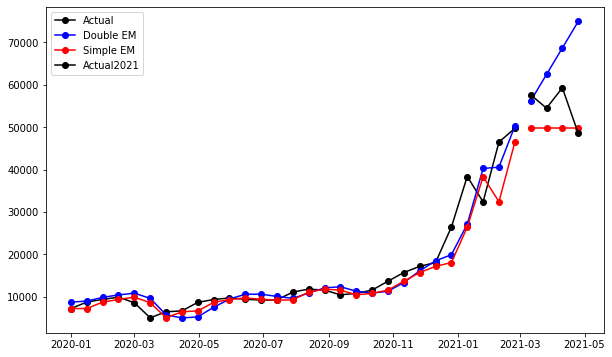

In [31]:
#Visualize the actual data and the two forecasts
plt.figure(figsize=(10, 6))
plt.plot(var1, marker='o', color='black', label = 'Actual')
plt.plot(fit2_bitcoin.fittedvalues, marker='o', color='blue')
line1, = plt.plot(fcast2, marker='o', color='blue', label = fcast2.name)
plt.plot(fit1_bitcoin.fittedvalues, marker='o', color='red')
line2, = plt.plot(fcast1, marker='o', color='red', label=fcast1.name)
plt.plot(actual2021['Close'], marker='o', color='black', label='Actual2021')

plt.legend()

**Observations**: Double exponential, which takes more into account past trends, predicted accurately the data closest to it (March 11). Simple exponential smoothing was almost accurate for the more recent day (April 25). also for the most part the forecast follows trend...? this doesn't make sense, will need to look more into what exponential smoothing actually is lmao

## B. Ethereum

In [32]:
#Run Simple Exponential Smoothing analysis
fit1_ether = SimpleExpSmoothing(var2).fit(optimized = True)

#Create a Forecast
fcast1_ether = fit1_ether.forecast(4).rename("Simple EM")
fcast1_ether

c:\users\heather\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


2021-03-11    1627.271903
2021-03-26    1627.271903
2021-04-10    1627.271903
2021-04-25    1627.271903
Freq: 15D, Name: Simple EM, dtype: float64

In [33]:
#Run Double Exponential Smoothing analysis
fit2_ether = Holt(var2).fit()

#Create a Forecast
fcast2_ether = fit2_ether.forecast(4).rename("Double EM")
fcast2_ether

2021-03-11    1833.039204
2021-03-26    1986.942511
2021-04-10    2140.845818
2021-04-25    2294.749126
Freq: 15D, Name: Double EM, dtype: float64

In [34]:
#From data pulled from coindesk.com
actual2021_ether = pd.DataFrame(data = {'Close' : [1822.23, 1681.91, 2118.71, 2276.23],\
                                 'Open': [1796.47, 1587.23, 2067.66, 2219.56]},
                         index= pd.date_range('2021-03-11', '2021-04-25', freq='15D'))

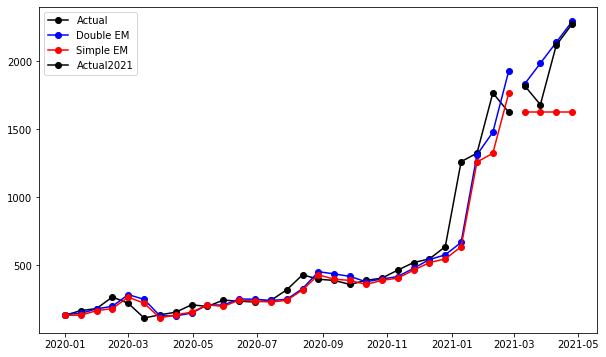

In [35]:
#Visualize the actual data and the two forecasts
plt.figure(figsize=(10, 6))
plt.plot(var2, marker='o', color='black', label = 'Actual')
plt.plot(fit2_ether.fittedvalues, marker='o', color='blue')
line1, = plt.plot(fcast2_ether, marker='o', color='blue', label = fcast2_ether.name)
plt.plot(fit1_ether.fittedvalues, marker='o', color='red')
line2, = plt.plot(fcast1_ether, marker='o', color='red', label=fcast1_ether.name)
plt.plot(actual2021_ether['Close'], marker='o', color='black', label='Actual2021')

plt.legend()

**Observations**: Double exponential smoothing and simple exponential smoothing both had a bit of a lag in actually staying with the past data, which you can see more clearly in January of 2021 where the blue and red lines are shifted to the right of the Actual data. However, the double exponential smoothing forecast was surprisingly accurate in predicting 3 out of the 4 periods in the extrapolated two months. This may suggest that our model is either extremely accurate or that Ethereum is following a more steady type of growth that can be predicted by a model, and isn't fluctuating as much as Bitcoin.

## C. Dogecoin

In [36]:
#Run Simple Exponential Smoothing analysis
fit1_dogecoin = SimpleExpSmoothing(var3).fit(optimized = True)

#Create a forecast
fcast1_dogecoin = fit1_dogecoin.forecast(4).rename("Simple EM")
fcast1_dogecoin

2021-03-11    0.056786
2021-03-26    0.056786
2021-04-10    0.056786
2021-04-25    0.056786
Freq: 15D, Name: Simple EM, dtype: float64

In [37]:
#Run Double Exponential Smoothing analysis
fit2_dogecoin = Holt(var3).fit()

#Create a forecast
fcast2_dogecoin = fit2_dogecoin.forecast(4).rename("Double EM")
fcast2_dogecoin

2021-03-11    0.075287
2021-03-26    0.092477
2021-04-10    0.109666
2021-04-25    0.126855
Freq: 15D, Name: Double EM, dtype: float64

In [38]:
#From data pulled from coindesk.com
actual2021_dogecoin = pd.DataFrame(data = {'Close' : [.056, .054, .064, .248],\
                                 'Open': [.056, .051, .062, .271]},
                         index= pd.date_range('2021-03-11', '2021-04-25', freq='15D'))

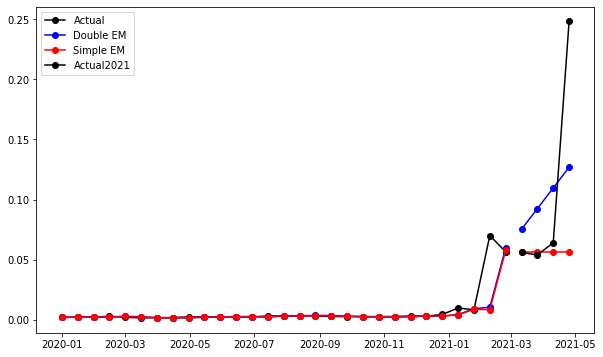

In [39]:
#Visualize the actual data and the two forecasts
plt.figure(figsize=(10, 6))
plt.plot(var3, marker='o', color='black', label = 'Actual')
plt.plot(fit2_dogecoin.fittedvalues, marker='o', color='blue')
line1, = plt.plot(fcast2_dogecoin, marker='o', color='blue', label = fcast2_dogecoin.name)
plt.plot(fit1_dogecoin.fittedvalues, marker='o', color='red')
line2, = plt.plot(fcast1_dogecoin, marker='o', color='red', label=fcast1_dogecoin.name)
plt.plot(actual2021_dogecoin['Close'], marker='o', color='black', label='Actual2021')

plt.legend()

**Observations**: Dogecoin is definitely a special case. Because of its large increase in the past few months, we really can't examine how accurate the model was in the previous year. However, the spike in Dogecoin value was not driven by anything that can be tangibly forecasted, so the forecasting models are not very informative, as we can see where the blue and red lines were really inaccurate.

## D. Litecoin

In [40]:
#Run Simple Exponential Smoothing analysis
fit1_litecoin = SimpleExpSmoothing(var4).fit(optimized = True)

#Create a Forecast
fcast1_litecoin = fit1_litecoin.forecast(4).rename("Simple EM")
fcast1_litecoin

2021-03-11    181.378623
2021-03-26    181.378623
2021-04-10    181.378623
2021-04-25    181.378623
Freq: 15D, Name: Simple EM, dtype: float64

In [41]:
#Run Double Exponential Smoothing analysis
fit2_litecoin = Holt(var4).fit()

#Create a forecast
fcast2_litecoin = fit2_litecoin.forecast(4).rename("Double EM")
fcast2_litecoin

2021-03-11    186.551672
2021-03-26    191.509542
2021-04-10    196.467412
2021-04-25    201.425282
Freq: 15D, Name: Double EM, dtype: float64

In [42]:
#From data pulled from coindesk.com
actual2021_litecoin = pd.DataFrame(data = {'Close' : [200.56, 182.27, 245.25,219.52],\
                                 'Open': [200.42, 171.65, 221.12, 225.41]},
                         index= pd.date_range('2021-03-11', '2021-04-25', freq='15D'))

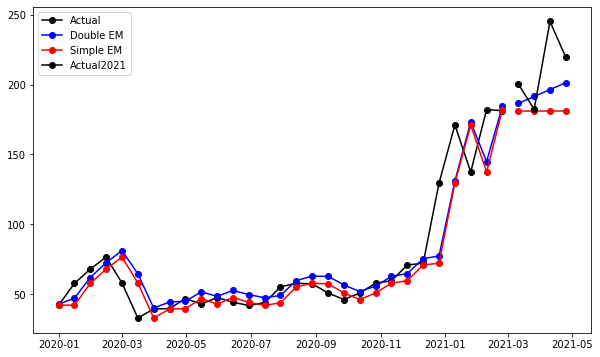

In [43]:
#Visualize the actual data and the two forecasts
plt.figure(figsize=(10, 6))
plt.plot(var4, marker='o', color='black', label = 'Actual')
plt.plot(fit2_litecoin.fittedvalues, marker='o', color='blue')
line1, = plt.plot(fcast2_litecoin, marker='o', color='blue', label = fcast2_litecoin.name)
plt.plot(fit1_litecoin.fittedvalues, marker='o', color='red')
line2, = plt.plot(fcast1_litecoin, marker='o', color='red', label=fcast1_litecoin.name)
plt.plot(actual2021_litecoin['Close'], marker='o', color='black', label='Actual2021')

plt.legend()

**Observations**: For the most part, the simple and double exponential smoothing maps closely to the actual values, with a slight lag. However, for mapping past the model, Litecoin was more volatile than the forecast model could have accounted for, so the models didn't really accurate predict what happened in March and April, and underestimated the coin's value.

## Question 3 - Are there seasonal trends or cyclical changes in price fluctuations? (Forecasting by Quarter)

**What is Triple Exponential Smoothing?**  

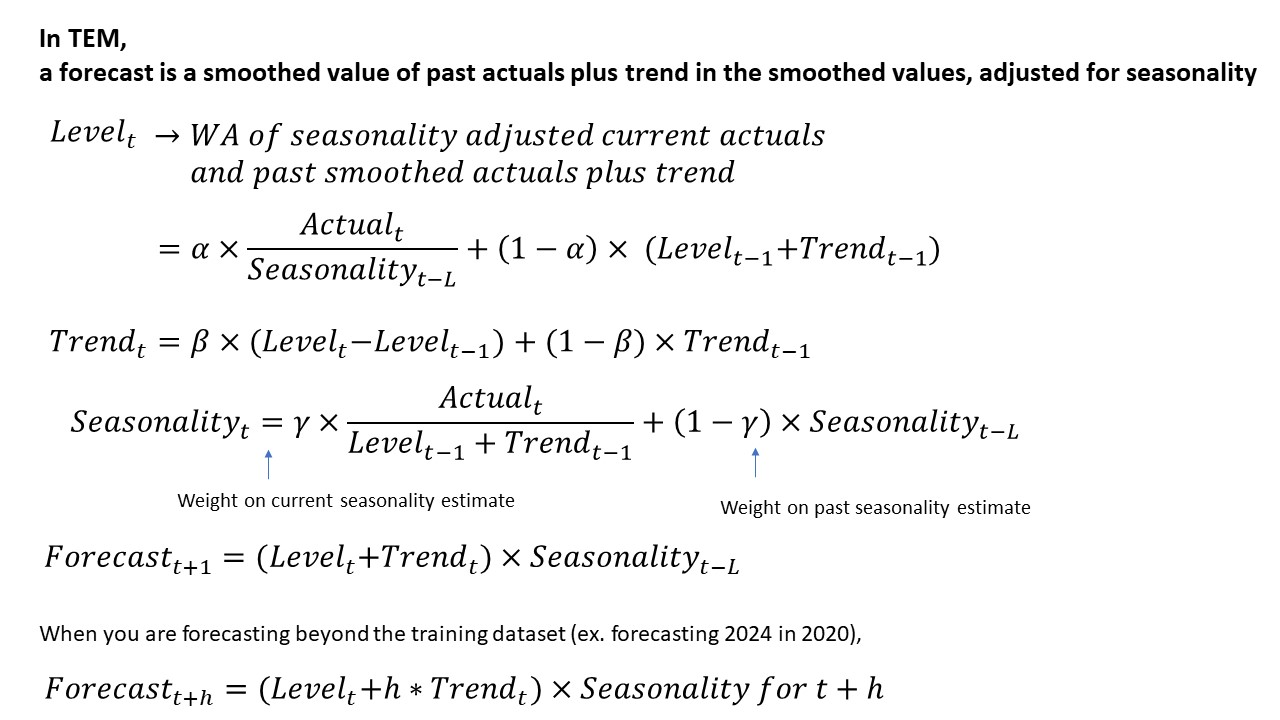

**Why is this relevant to our dataset?**

Our forecasts are in **3 month increments**, and during certain quarters, people might be more willing to invest in crytpo, receive a jump in income, or make portfolio adjustments. Seasonality adjustments allow our forecast to adjust for a these types of jumps. We will still have an initial level and perhaps a trend (if that level is moving up or down) but now we will also have an adjustment based on which quarter we are in. This is our seasonality adjustment and it is added in as a multiplicative factor. Instead of adding another term, we multiply the whole forecast by a index that varies by quarter.

Let's assume:
- Q1 (Jan-March 31st)
- Q2 (April-June 30th)
- Q3 (July-September 30th)
- Q4 - (October-December 31st)

**How did we do it?**

We used the function ```ExponentialSmoothing``` and used some additional arguments:
- variable that is being forecasted, as before
- seasonal_periods = frequency of seasons (4 quarters)
- trend= 'add' says add the trend to the forecast as opposed to multiplying 
- seasonal = 'mul' says to multiply the seasonality, as opposed to adding it

We use the same fit, forecast, and summary methods as before.

**Summary**: Triple Exponential Smoothing adjusts for seasonality, which is not accounted for in simple and double exponential smoothing and should offer a more accurate forecast in relation to actual performance. (pink line) 

In [44]:
# cleaning dataframe and indexing dates
bitcoin_season = bitcoin.copy()
ether_season = ether.copy()
dogecoin_season = dogecoin.copy()
litecoin_season = litecoin.copy()

bitcoin_season['Day'] = bitcoin['Date'].dt.day
ether_season['Day'] = ether['Date'].dt.day
dogecoin_season['Day'] = dogecoin['Date'].dt.day
litecoin_season['Day'] = litecoin['Date'].dt.day

bitcoin_season.index = bitcoin_season['Date']
ether_season.index = ether_season['Date']
dogecoin_season.index = dogecoin_season['Date']
litecoin_season.index = litecoin_season['Date']

In [45]:
#3 months = one quarter, using that increment as our frequency
bitcoin_season = bitcoin_season.asfreq("3M")
ether_season = ether_season.asfreq("3M")
dogecoin_season = dogecoin_season.asfreq("3M")
litecoin_season = litecoin_season.asfreq("3M")

In [46]:
#create variables
var10 = bitcoin_season['Close']
var20 = ether_season['Close']
var30 = dogecoin_season['Close']
var40 = litecoin_season['Close']

In [47]:
# simple smoothing summary for bitcoin
fit10_bitcoin = SimpleExpSmoothing(var10).fit(optimized = True)
fit10_bitcoin.summary()

c:\users\heather\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                       SimpleExpSmoothing Model Results                       
==============================================================================
Dep. Variable:                  Close   No. Observations:                   21
Model:             SimpleExpSmoothing   SSE                      457960406.583
Optimized:                       True   AIC                            358.853
Trend:                           None   BIC                            360.942
Seasonal:                        None   AICC                           361.353
Seasonal Periods:                None   Date:                 Mon, 10 May 2021
Box-Cox:                        False   Time:                         09:30:08
Box-Cox Coeff.:                  None                                         
==============================================================================
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.9950000                alpha                 True
initial_level              368.76700                  l.0                 True
------------------------------------------------------------------------------
"""

In [48]:
# Create a forecast and visualize
# some string formatting here to make the graph look nicer
# $ calls latex so that alpha will look like greek symbol
# we are forecasting ahead 4 periods, so we're looking at q1, q2, and q3, q4 

fcast10 = fit10_bitcoin.forecast(4).rename("Simple EM")

fcast10

2021-04-30    33017.629161
2021-07-31    33017.629161
2021-10-31    33017.629161
2022-01-31    33017.629161
Freq: 3M, Name: Simple EM, dtype: float64

In [49]:
#using Holt model
fit20_bitcoin = Holt(var10).fit()
fit20_bitcoin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              Holt Model Results                              
==============================================================================
Dep. Variable:                  Close   No. Observations:                   21
Model:                           Holt   SSE                      386452922.772
Optimized:                       True   AIC                            359.288
Trend:                       Additive   BIC                            363.466
Seasonal:                        None   AICC                           365.288
Seasonal Periods:                None   Date:                 Mon, 10 May 2021
Box-Cox:                        False   Time:                         09:30:08
Box-Cox Coeff.:                  None                                         
==============================================================================
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.9478571                alpha                 True
smoothing_trend            0.9478571                 beta                 True
initial_level              368.76700                  l.0                 True
initial_trend              79.550995                  b.0                 True
------------------------------------------------------------------------------
"""

In [50]:
#double exponential smoothing forecast, based off Holt

fcast20 = fit20_bitcoin.forecast(4).rename("Double EM")

fcast20

2021-04-30     49889.189776
2021-07-31     67537.687910
2021-10-31     85186.186044
2022-01-31    102834.684178
Freq: 3M, Name: Double EM, dtype: float64

In [51]:
# seasonality adjusted, triple exponential smoothing
fit30_bitcoin = ExponentialSmoothing(var10, seasonal_periods=4, trend='add', seasonal='mul').fit()

fit30_bitcoin.summary()

c:\users\heather\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                       ExponentialSmoothing Model Results                       
================================================================================
Dep. Variable:                    Close   No. Observations:                   21
Model:             ExponentialSmoothing   SSE                      487371114.752
Optimized:                         True   AIC                            372.160
Trend:                         Additive   BIC                            380.516
Seasonal:                Multiplicative   AICC                           394.160
Seasonal Periods:                     4   Date:                 Mon, 10 May 2021
Box-Cox:                          False   Time:                         09:30:08
Box-Cox Coeff.:                    None                                         
=================================================================================
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8182143                alpha                 True
smoothing_trend               0.8182143                 beta                 True
smoothing_seasonal            0.1817857                gamma                 True
initial_level                 9580.4916                  l.0                 True
initial_trend                 594.95594                  b.0                 True
initial_seasons.0             0.0384914                  s.0                 True
initial_seasons.1             0.0467949                  s.1                 True
initial_seasons.2             0.0652034                  s.2                 True
initial_seasons.3             0.0731666                  s.3                 True
---------------------------------------------------------------------------------
"""

In [52]:
# triple exponential smoothing forecasts

fcast30 = fit30_bitcoin.forecast(4).rename("Triple EM")

fcast30

2021-04-30    44202.563866
2021-07-31    50922.615420
2021-10-31    61084.268959
2022-01-31    80968.576316
Freq: 3M, Name: Triple EM, dtype: float64

# Bitcoin

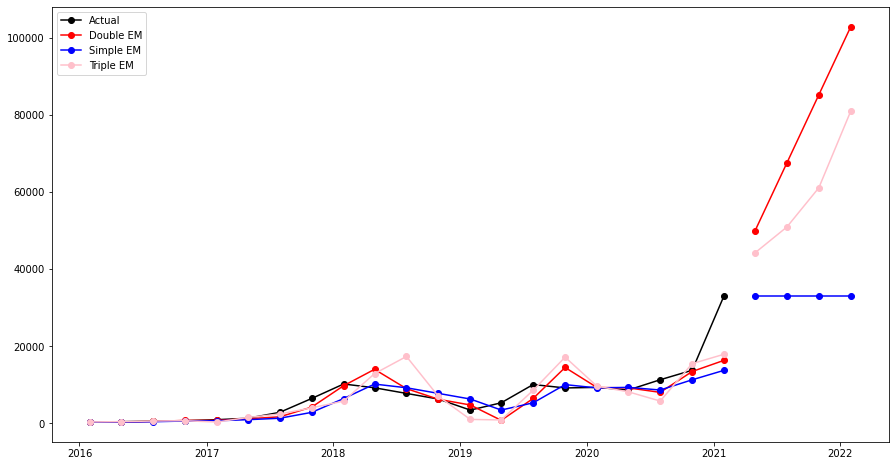

In [53]:
# triple exponential smoothing graph - adjusting for seasonality, forecasting the next 4 quarters 

plt.figure(figsize=(15, 8))

# plotting actual historical performance of Bitcoin
plt.plot(var10, marker='o', color='black', label = 'Actual')

# plotting blue line: double exponential forecast + smoothing of historical data
plt.plot(fit20_bitcoin.fittedvalues, marker='o', color='red')
line1, = plt.plot(fcast20, marker='o', color='red', label = fcast20.name)

# plotting red line: single exponential forecast + smoothing of historical data
plt.plot(fit10_bitcoin.fittedvalues, marker='o', color='blue')
line2, = plt.plot(fcast10, marker='o', color='blue', label=fcast10.name)

# plotting pink line: triple exponential forecast + smoothing of historical data
line3, = plt.plot(fcast30, marker='o', color='pink', label=fcast30.name)
plt.plot(fit30_bitcoin.fittedvalues, marker='o', color='pink')

plt.legend()

**Observations:** 
We can see that the blue line (simple EM) and red line (double EM) follow the black line (actual performance) a little closer than the pink line (triple EM). This suggests that our simple and double exponential smoothing models likely have a better forecast compared to triple EM. Given that Holt's trend-corrected double exponential smoothing is usually more reliable for handling data that shows trends, compared to the single procedure, our assumption is that this offers a better fit to actual data and thus, our forecast.

Ultimately, it looks like in the next fiscal year, Bitcoin is forecasted to do really well given our most accurate models: double EM. We can see that there is almost an exponential forecasted increase from Q1 to Q4. Since it is currently Q2, we can double check this with the actual performance of Bitcoin. On January 1st, the market price was at around \\$30,000. As of today, May 10th, the market price is at around \\$59,000. (https://www.coindesk.com/price/bitcoin)

This growth was correctly forecasted by our double EM model, but our numbers are a little off - on the graph, Q2 looks close to around \\$70,000 which is possible by June 31st.

## Ethereum

In [54]:
#create simple exponential smoothing model for ether
fit10_ether = SimpleExpSmoothing(var20).fit(optimized = True)
#forecast 4 periods using simple exponential smoothing model  for ether
fcast20 = fit10_ether.forecast(4).rename("Simple EM")
# fit the points
fit20_ether = Holt(var20).fit()
#forecast 4 periods using double exponential smoothing model
fcast30 = fit20_ether.forecast(4).rename("Double EM")
#create triple exponential smoothing model for ether, adjusts for seasonality
fit30_ether = ExponentialSmoothing(var20, seasonal_periods=4, trend='add', seasonal='mul').fit()
#forecast 4 periods using triple exponential smoothing model
fcast40 = fit30_ether.forecast(4).rename("Triple EM")

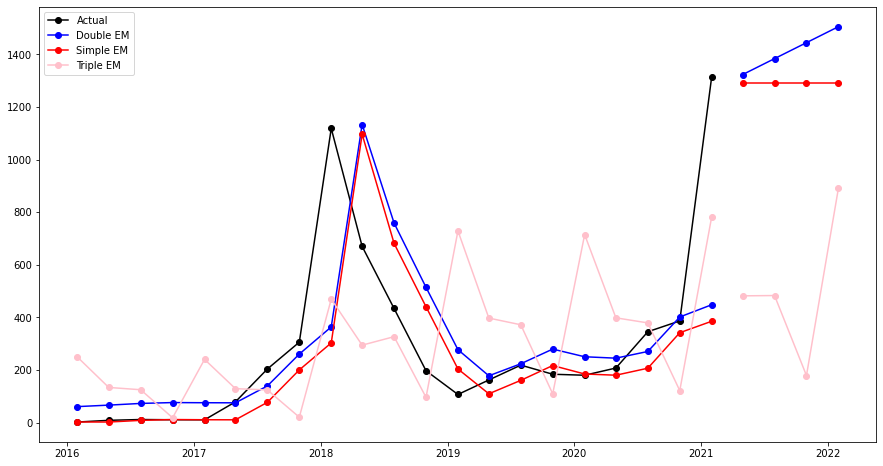

In [55]:
# triple exponential smoothing graph - adjusting for seasonality, forecasting the next 4 quarters 

plt.figure(figsize=(15, 8))
plt.plot(var20, marker='o', color='black', label = 'Actual')
plt.plot(fit20_ether.fittedvalues, marker='o', color='blue')
line1, = plt.plot(fcast30, marker='o', color='blue', label = fcast30.name)
plt.plot(fit10_ether.fittedvalues, marker='o', color='red')
line2, = plt.plot(fcast20, marker='o', color='red', label=fcast20.name)
line3, = plt.plot(fcast40, marker='o', color='pink', label=fcast40.name)
plt.plot(fit30_ether.fittedvalues, marker='o', color='pink')

plt.legend()

**Observations:** Our Triple EM is noticeably different compared to the actual peformance of Ethereum. Instead, our simple and double EM lines follow the actual performance more closely. This suggests that there is no seasonality factor that can be attributed to Ethereum's past performance.

Using the same assumptions about double EM's reliability compared to single procedure, it looks like the blue line (double EM) forecasts that Ethereum is likely to grow in market price over the next fiscal year. However, this growth compared to Bitcoin is not as exponential and more linear. 

Let's double check with current Q2 data. (https://www.coindesk.com/price/ethereum)
- Jan 1st: \\$730 
- May 10th: \\$4125

It looks like our Q2 forecasts are incorrect because current performance is already at around \\$4125, which is way higher than around \\$1400.

## Dogecoin

In [56]:
#create simple exponential smoothing model for ether
fit10_doge = SimpleExpSmoothing(var30).fit(optimized = True)
#forecast 4 periods using simple exponential smoothing model  for ether
fcast30 = fit10_doge.forecast(4).rename("Simple EM")
# fit the points
fit20_doge = Holt(var30).fit()
#forecast 4 periods using double exponential smoothing model
fcast40 = fit20_doge.forecast(4).rename("Double EM")
#create triple exponential smoothing model for ether, adjusts for seasonality
fit30_doge = ExponentialSmoothing(var30, seasonal_periods=4, trend='add', seasonal='mul').fit()
#forecast 4 periods using triple exponential smoothing model
fcast50 = fit30_doge.forecast(4).rename("Triple EM")

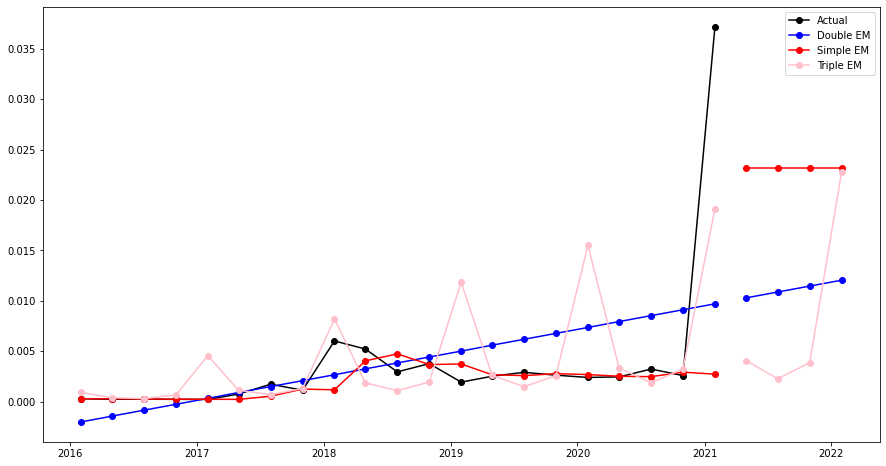

In [57]:
# triple exponential smoothing graph - adjusting for seasonality, forecasting the next 4 quarters 

plt.figure(figsize=(15, 8))
plt.plot(var30, marker='o', color='black', label = 'Actual')
plt.plot(fit20_doge.fittedvalues, marker='o', color='blue')
line1, = plt.plot(fcast40, marker='o', color='blue', label = fcast40.name)
plt.plot(fit10_doge.fittedvalues, marker='o', color='red')
line2, = plt.plot(fcast30, marker='o', color='red', label=fcast30.name)
line3, = plt.plot(fcast50, marker='o', color='pink', label=fcast50.name)
plt.plot(fit30_doge.fittedvalues, marker='o', color='pink')

plt.legend()

**Observations:** Our Triple EM is noticeably different compared to the actual peformance of Dogecoin. Same with our simple EM model. Our double EM model follows the actual performance the closest. This suggests that there is no seasonality factor that can be attributed to Doegecoin's past performance.

However, because Dogeoin's recent growth is due primarly to positive demand shocks from Elon Musk and other retail investing sentiment, our expectation is that any type of forecast is like inaccurate. 

Let's double check with current Q2 data. (https://www.coindesk.com/price/dogecoin)
Dogecoin is currently trading at \\$0.53, signifcantly different from our forecasts.

## Litecoin

In [58]:
#create simple exponential smoothing model for ether
fit10_lite = SimpleExpSmoothing(var40).fit(optimized = True)
#forecast 4 periods using simple exponential smoothing model  for ether
fcast40 = fit10_lite.forecast(4).rename("Simple EM")
# fit the points, Holt's method displays a constant linear trend indefinitely into the future
fit20_lite = Holt(var40).fit()
#forecast 4 periods using double exponential smoothing model
fcast50 = fit20_lite.forecast(4).rename("Double EM")
#create triple exponential smoothing model for ether, adjusts for seasonality
fit30_lite = ExponentialSmoothing(var40, seasonal_periods=4, trend='add', seasonal='mul').fit()
#forecast 4 periods using triple exponential smoothing model
fcast60 = fit30_lite.forecast(4).rename("Triple EM")

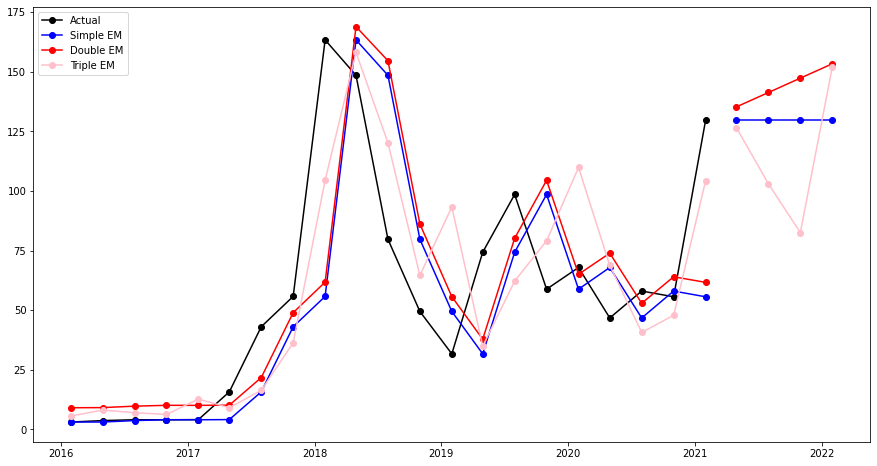

In [59]:
# triple exponential smoothing graph - adjusting for seasonality, forecasting the next 4 quarters 

plt.figure(figsize=(15, 8))

plt.plot(var40, marker='o', color='black', label = 'Actual')
plt.plot(fit10_lite.fittedvalues, marker='o', color='blue')
line1, = plt.plot(fcast40, marker='o', color='blue', label = fcast40.name)
line2, = plt.plot(fcast50, marker='o', color='red', label=fcast50.name)
plt.plot(fit20_lite.fittedvalues, marker='o', color='red')
line3, = plt.plot(fcast60, marker='o', color='pink', label=fcast60.name)
plt.plot(fit30_lite.fittedvalues, marker='o', color='pink')

plt.legend()

**Observations:** Our triple EM generally follows the actual performance of Litecoin quite well. This suggests that there could be a seasonality factor that can be attributed to Litecoin's past performance. Although there is a strange jump (pink line) not reflective of actual performance from late 2018 to early 2019. Considering the how triple EM follows the general trend of actual performance, we'll assume forecasts using the pink line.

Let's double check with current Q1 and Q2 data to see if we can observe the dip. (https://www.coindesk.com/price/litecoin)
- Jan 1st: \\$126
- Feb 28th: \\$164
- March 31st: \\$195
- April 30th: \\$269
- May 10th: \\$402

It looks like our triple EM forecasts are incorrect because current performance is positively increasing while our model predicted that there would be a dip before returning to around \\$150. This is nowhere close because as of May (Q2), the market price has already exceeded \\$400.

## Question 4 - How does the price fluctuations of currencies correlate with each other?
We want to investiage the correlations in price changes between the different coins, since less correlation allows for investors to diversify away some risk by purchasing different coins.

In [60]:
#Drop unncessary columns for correlation analysis
bitcoin_change = bitcoin.drop(['Name', 'Symbol', 'High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap'], axis = 1)
ether_change = ether.drop(['Name', 'Symbol', 'High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap'], axis = 1)
dogecoin_change = dogecoin.drop(['Name', 'Symbol', 'High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap'], axis = 1)
litecoin_change = litecoin.drop(['Name', 'Symbol', 'High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap'], axis = 1)

#specify column names for each coin for when we combine columns
bitcoin_change = bitcoin_change.rename(columns = {'Date':'Date', "DailyChange": "Bitcoin_Change"})
ether_change = ether_change.rename(columns = {'Date':'Date', "DailyChange": "Ether_Change"})
dogecoin_change = dogecoin_change.rename(columns = {'Date':'Date', "DailyChange": "Dogecoin_Change"})
litecoin_change = litecoin_change.rename(columns = {'Date':'Date', "DailyChange": "Litecoin_Change"})

In [61]:
#Create different datasets for comparing two coins together
bitcoin_ether = bitcoin_change.merge(ether_change, on = "Date", how = "left")
bitcoin_dogecoin = bitcoin_change.merge(dogecoin_change, on = "Date", how = "left")
ether_dogecoin = ether_change.merge(dogecoin_change, on = "Date", how = "left")
bitcoin_litecoin = bitcoin_change.merge(litecoin_change, on = "Date", how = "left")
ether_litecoin = ether_change.merge(litecoin_change, on = "Date", how = "left")

Text(0.25, -0.2, 'corr =0.54')

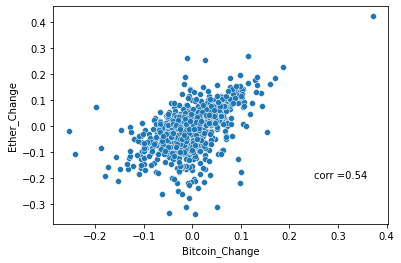

In [62]:
#Correlation values for Bitcoin and Ethereum between their daily change values
correlation_BE = np.corrcoef(bitcoin_ether['Bitcoin_Change'], bitcoin_ether['Ether_Change'])
correlation_BE = correlation_BE[0,1]
#format as 2 decimal places
format_BE = "{:.2f}".format(correlation_BE)

#plot of the Daily change in Bitcoin vs Daily Change in Ethereum
sns.scatterplot(data = bitcoin_ether, x= "Bitcoin_Change", y = "Ether_Change")
plt.text(.25, -0.2, "corr =" + format_BE)

Text(0.25, -2, 'corr =0.33')

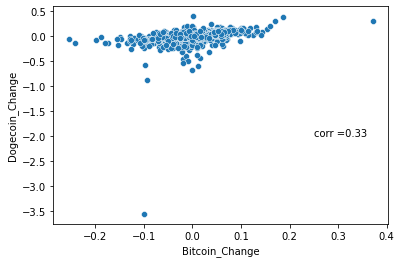

In [63]:
#Correlation values for Bitcoin and Dogecoin between their daily change values
correlation_BD = np.corrcoef(bitcoin_dogecoin['Bitcoin_Change'], bitcoin_dogecoin['Dogecoin_Change'])
correlation_BD = correlation_BD[0,1]
#format as 2 decimal places
format_BD = "{:.2f}".format(correlation_BD)

#plot of the Daily Change in Bitcoin vs Daily Change in Dogecoin
sns.scatterplot(data = bitcoin_dogecoin, x = "Bitcoin_Change", y = "Dogecoin_Change")
plt.text(.25, -2, "corr =" + format_BD)

Text(0.25, -2, 'corr =0.25')

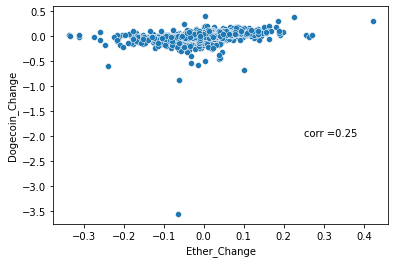

In [64]:
#Correlation values for Ethereum and Dogecoin between their daily change values
correlation_ED = np.corrcoef(ether_dogecoin['Ether_Change'], ether_dogecoin['Dogecoin_Change'])
correlation_ED = correlation_ED[0,1]
#format as 2 decimal places
format_ED = "{:.2f}".format(correlation_ED)

#plot of Daily Chage in Ethereum vs Daily Change in Dogecoin
sns.scatterplot(data = ether_dogecoin, x = "Ether_Change", y = "Dogecoin_Change")
plt.text(.25, -2, "corr =" + format_ED)

Text(0.25, -0.4, 'corr =0.63')

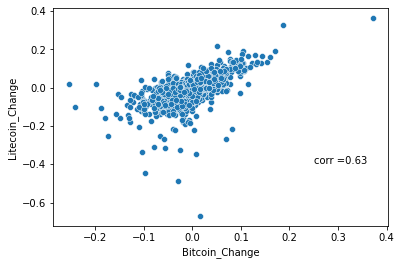

In [65]:
#Correlation values for Bitcoin and Dogecoin between their daily change values
correlation_BL = np.corrcoef(bitcoin_litecoin['Bitcoin_Change'], bitcoin_litecoin['Litecoin_Change'])
correlation_BL = correlation_BL[0,1]
#format as 2 decimal places
format_BL = "{:.2f}".format(correlation_BL)

#plot of Daily Change in Bitcoin vs Daily Change in Litecoin
sns.scatterplot(data = bitcoin_litecoin, x = "Bitcoin_Change", y = "Litecoin_Change")
plt.text(.25, -.4, "corr =" + format_BL)

Text(0.25, -0.4, 'corr =0.52')

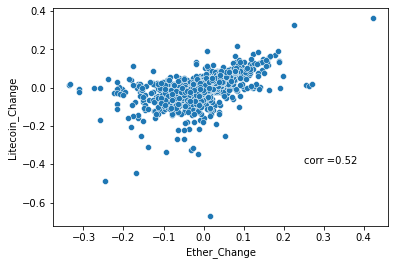

In [66]:
#Correlation values for Bitcoin and Dogecoin between their daily change values
correlation_EL = np.corrcoef(ether_litecoin['Ether_Change'], ether_litecoin['Litecoin_Change'])
correlation_EL = correlation_EL[0,1]
#format as 2 decimal places
format_EL = "{:.2f}".format(correlation_EL)

#plot of Daily Change in Bitcoin vs Daily Change in Litecoin
sns.scatterplot(data = ether_litecoin, x = "Ether_Change", y = "Litecoin_Change")
plt.text(.25, -.4, "corr =" + format_EL)

**Observations**: We consider that Bitcoin, Ethereum, and Litecoin to be more "established: crytocurrencies, and we see that they are weakly correlated with each other (between 0.5 and 0.7). This means that on a random day where Ethereum has a .05% change in price, Bitcoin or Litecoin is also slightly likely have also had a small positive change in price as well. On the other hand, in comparison to Dogecoin, which is not necessarily taken very seriously, there is very little correlation between Dogecoin and the other coins. From these dot plots, we can take away the idea that when one coin price goes up, other well established coin prices will also go up, so very little risk is diversified away if we were to invest in multiple different coins for our portfolio. 

## Conclusion

Overall, the topic of cryptocurrency is heavily debated for its viability as an security or currency in the future. From our study and analysis of the data from the past year and past five years, we have a few final points that we can draw on for our recommendation for investing into cryptocurrencies.
1. On a general day to day basis, you don't see much change in cryptocurrency prices. The giant surges and falls are irregular and this isn't a situation where you see consistent growth.
2. Generally, you really can't forecast or predict prices. Ethereum was the coin that had the best forecast model that fit with actual data, which we can possibly assume that it has the most predictable growth. However, all the other coins had greater fluctuation than could be predicted by forecast models.
3. There isn't any particular time of year where you can best benefit from buying cryptocurrency. We did not see strong evidence of seasonality across all the analyze crypocurrencies, except Litecoin.
4. Many of the coins are weakly correlated with each other. If you were to invest in different types of coins, you may not be mitigating any risk my diversification of cryptocurrencies in your portfolio.

As for our main question, **when and which coins should you invest in?** 

In the end, our data was inconclusive in finding which is the best to invest in at the so-called "best" time. Maybe things will change in the future, but for now, no one really knows for sure if prices will continue to rise, if the bubble will burst, or a totally different outcome is on the horizon, and our data has reflected this uncertainty.

Additionally, it really depends on what your risk tolerance is and what you believe a specific cryptocurrence's viability is. For these Altcoins (cryptocurrencies other than Bitcoin), the overwhelming majority are highly illiquid, have small mining power, and are more speculative than useful as a medium of exchange or store of value given its volatility.